In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Naive Bayes Challenge

Objective: Create a Naive Bayes classifier to perform sentiment analysis on reviews from a website (amazon, yelp, or imdb)

First, let's load the amazon data, we'll use this to train our classifier.

In [2]:
amazon_raw = pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)
amazon_raw.columns = ['message', 'sentiment']

In [3]:
amazon_raw.head()

,message,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


Next, let's find the most commonly used words - choosing more common words will make the classifier more applicable to larger datasets (which are also likely to contain the same common words).

In [4]:
most_common_words = pd.Series(' '.join(amazon_raw['message']).lower().split()).value_counts()[:100]
print(most_common_words[:20])
print(most_common_words[20:40])
print(most_common_words[40:60])
print(most_common_words[60:80])
print(most_common_words[80:])

the      513
i        313
and      310
is       238
it       237
a        217
this     197
to       195
my       143
of       119
for      119
phone    118
not      115
with     107
very     102
was       90
on        87
in        87
that      75
have      72
dtype: int64
good       66
great      63
you        62
but        45
as         45
works      43
had        43
so         42
are        41
battery    39
sound      35
has        34
one        34
all        34
quality    33
from       33
phone.     33
would      32
headset    32
your       32
dtype: int64
it.          31
like         30
if           29
than         28
don't        28
i've         28
after        27
use          27
it's         27
product      27
really       26
be           26
no           26
at           24
-            24
recommend    24
does         23
or           23
work         23
only         22
dtype: int64
i'm          22
when         22
get          22
excellent    21
product.     21
just         21
up   

In [5]:
# select keywords that could be useful for determining sentiment

# first keywords list (25 most common that could have had sentiment relation)
keywords = ['not', 'very', 'good', 'great', 'but', 'works', 'quality', 'like', "don't", 'no', 'really', 'recommend', 'work',
            'excellent', 'just', 'well', 'love', 'nice', 'best', 'worked', 'better', 'great.', "doesn't", 'easy', 'well.']

# second keywords list (keeping only the explicitly positive keywords)
#keywords = ['good', 'great', 'like', 'excellent', 'love', 'nice', 'best', 'better', 'great.']

# third keywords list (keeping only the explicitly negative keywords)
#keywords = ['not', "don't", 'no', "doesn't"]

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon_raw[str(key)] = amazon_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

Let's check a heatmap to see how strongly any of the keywords are correlated to each other before moving forward.

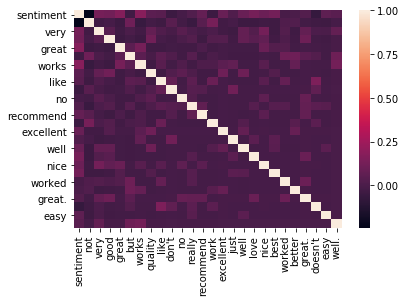

In [6]:
sns.heatmap(amazon_raw.corr())

It doesn't appear that many of the keywords are highly correlated, so let's continue using all of them for this exercise.

In [7]:
# create the data and target for NB model

data = amazon_raw[keywords]
target = amazon_raw['sentiment']

In [8]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 322


Not great, but I can always modify the keywords to try to improve!

first keywords list: 322 mislabeled

second: 395

third: 417

Do any overfit?
- not particularly

Which performs best?
- the keyword list using the most keywords

Which features were most impactful?
- positive keywords were more impactful than negative